In [1]:
# Load necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_recall_curve

## Exploratory Data Analysis

In [2]:
## Titanic_train.csv
df_train = pd.read_csv('Titanic_train.csv')
df_train.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [3]:
# Total no.of rows and columns
df_train.shape

(891, 12)

In [4]:
# Drop serier which aren't necessary
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# Check for missing values in the training set
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
# Fill missing values
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [7]:
# Encode 'Sex' column
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])

In [8]:
# Encode 'Embarked' column
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])

In [9]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


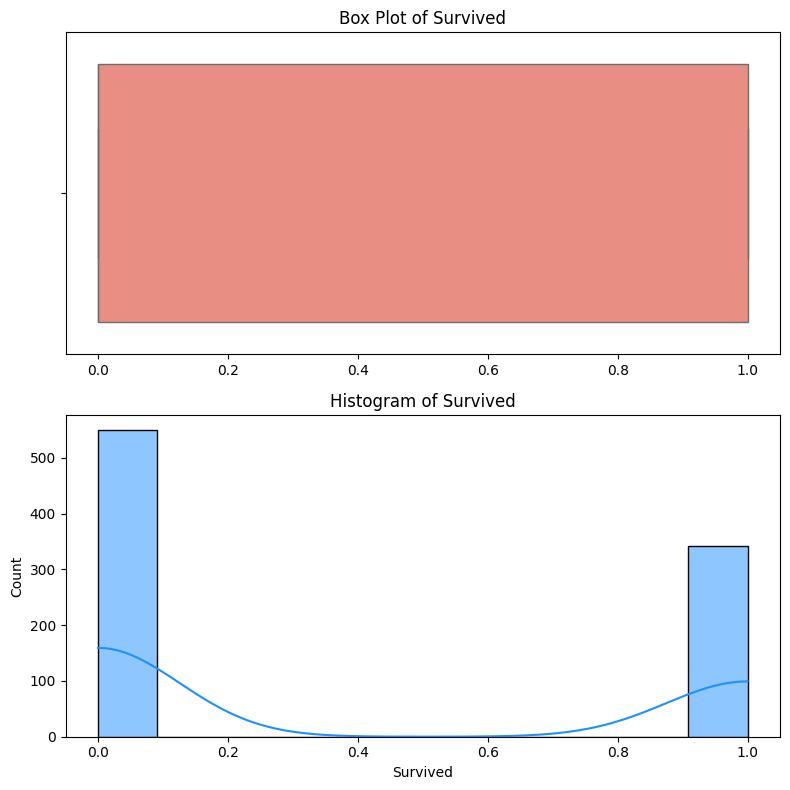

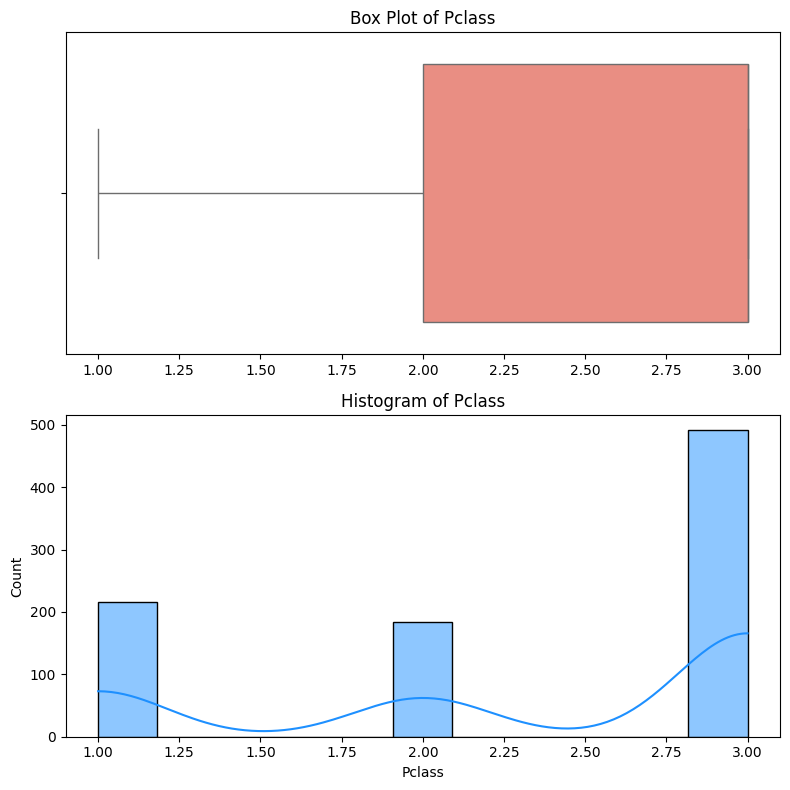

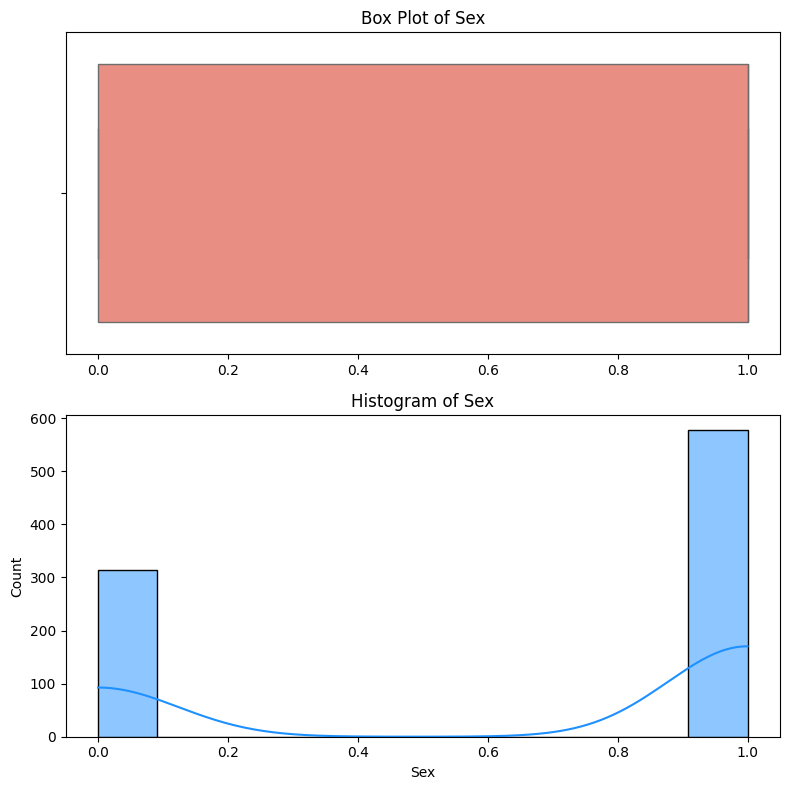

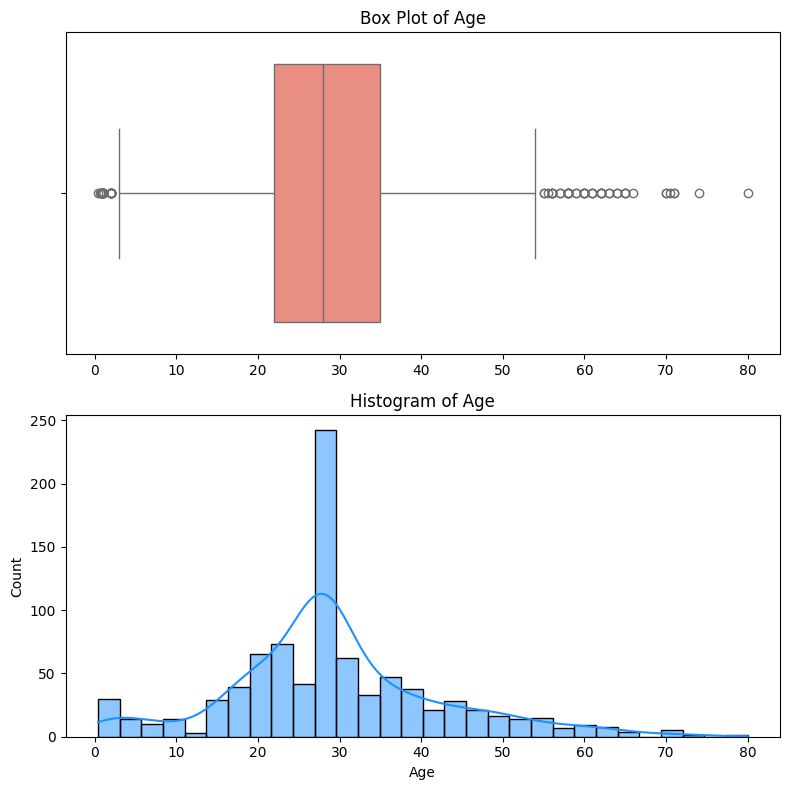

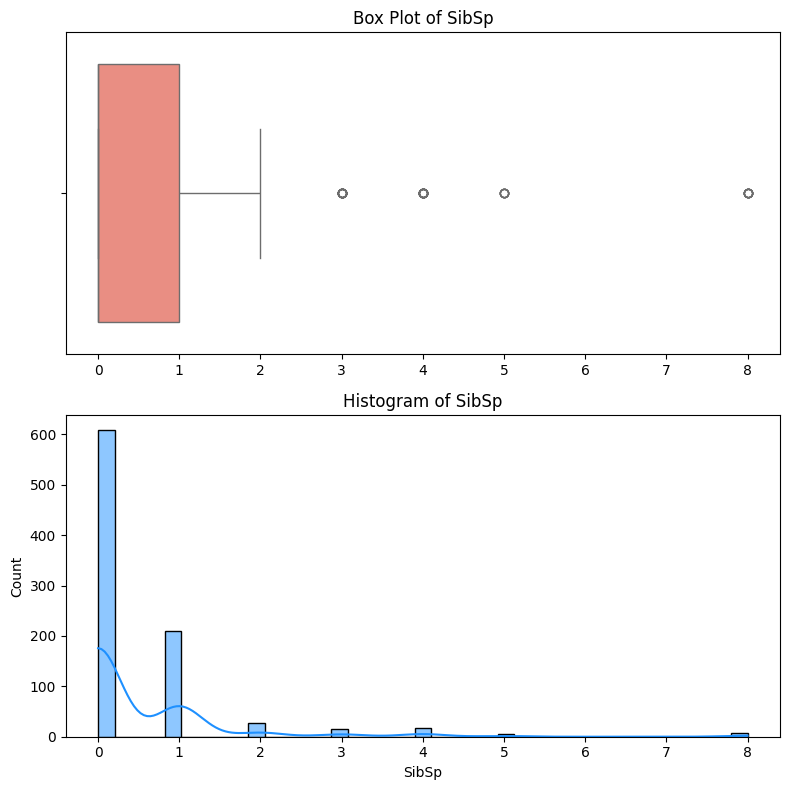

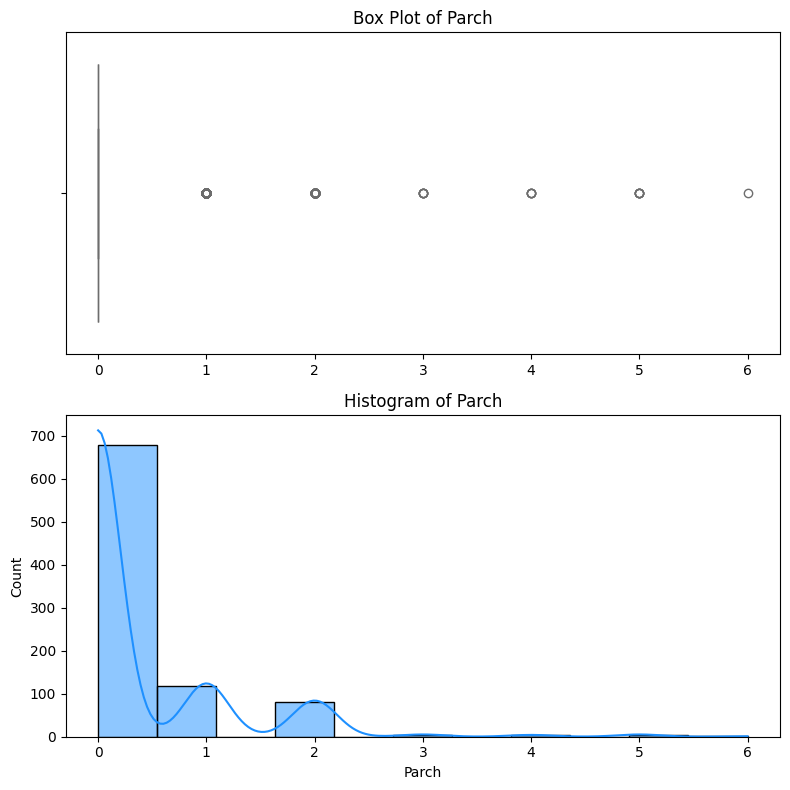

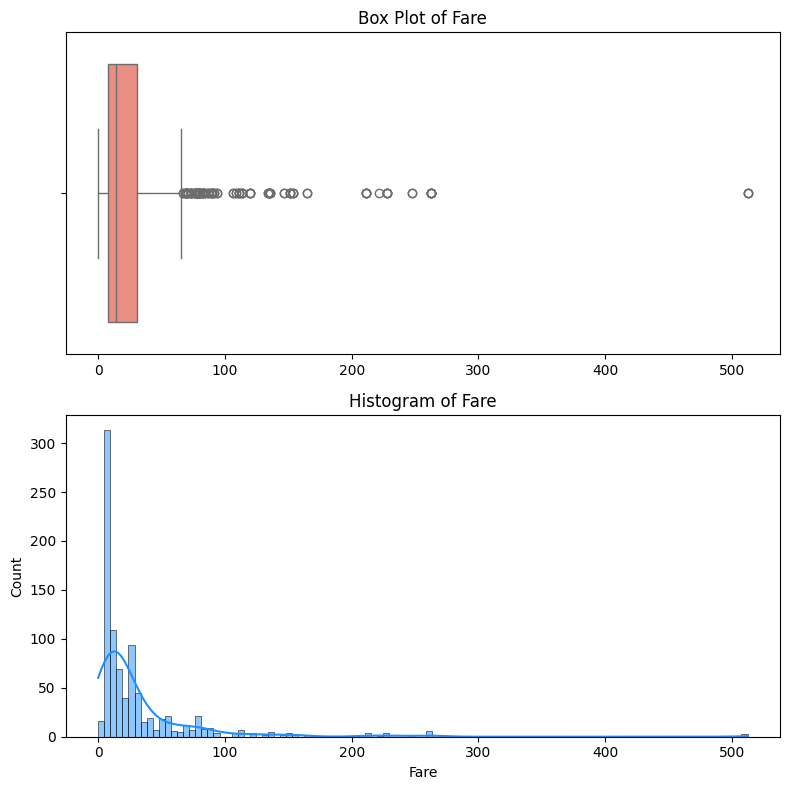

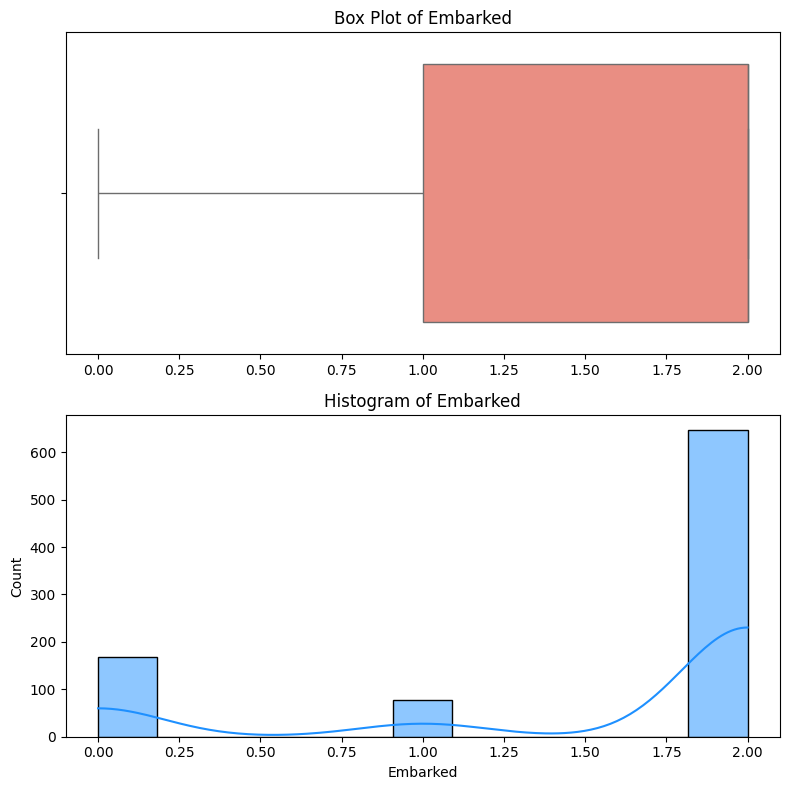

In [10]:
# Function to plot boxplot and histogram
def plot_boxplot_hist(data, column):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

    # Box plot
    sns.boxplot(x=data[column], color='salmon', ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')
    axes[0].set_xlabel('')

    # Histogram
    sns.histplot(data[column], kde=True, color='dodgerblue', ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot box plot and histogram for each numeric column one by one
for col in df_train.select_dtypes(include=['float64', 'int64']).columns:
    plot_boxplot_hist(df_train, col)

In [11]:
# Remove outliers of present

Q1 = df_train.quantile(0.25)
print(f'Q1:\n{Q1}')
Q3 = df_train.quantile(0.75)
print(f'\nQ3:\n{Q3}')
IQR = Q3 - Q1
print(f'\nIQR:\n{IQR}')

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
print(f'\nLower Bound:\n{lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'\nUpper Bound:\n{upper_bound}\n')

# Outliers
outliers = {}
for col in df_train.columns:
    df_train_outliers = df_train[(df_train[col] < lower_bound[col]) | (df_train[col] > upper_bound[col])]
    if not df_train_outliers.empty:
        outliers[col] = df_train_outliers[col]
        print(f"Outlier(s) in column '{col}':")
        print(df_train_outliers)
    else:
        print(f"No outliers in column '{col}'")

# Remove outliers
df_train_no_outliers = df_train[(df_train >= lower_bound) & (df_train <= upper_bound)].dropna().reset_index(drop=True)
print("\nNo outliers:")
print(df_train_no_outliers)

# Re-assigning to new variable
df_train = df_train_no_outliers
df_train.head()

Q1:
Survived     0.0000
Pclass       2.0000
Sex          0.0000
Age         22.0000
SibSp        0.0000
Parch        0.0000
Fare         7.9104
Embarked     1.0000
Name: 0.25, dtype: float64

Q3:
Survived     1.0
Pclass       3.0
Sex          1.0
Age         35.0
SibSp        1.0
Parch        0.0
Fare        31.0
Embarked     2.0
Name: 0.75, dtype: float64

IQR:
Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
Embarked     1.0000
dtype: float64

Lower Bound:
Survived    -1.500
Pclass       0.500
Sex         -1.500
Age          2.500
SibSp       -1.500
Parch        0.000
Fare       -26.724
Embarked    -0.500
dtype: float64

Upper Bound:
Survived     2.5000
Pclass       4.5000
Sex          2.5000
Age         54.5000
SibSp        2.5000
Parch        0.0000
Fare        65.6344
Embarked     3.5000
dtype: float64

No outliers in column 'Survived'
No outliers in column 'Pclass'
No outliers in column 'Se

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,7.2500,2
1,1,3,0,26.0,0.0,0.0,7.9250,2
2,1,1,0,35.0,1.0,0.0,53.1000,2
3,0,3,1,35.0,0.0,0.0,8.0500,2
4,0,3,1,28.0,0.0,0.0,8.4583,1


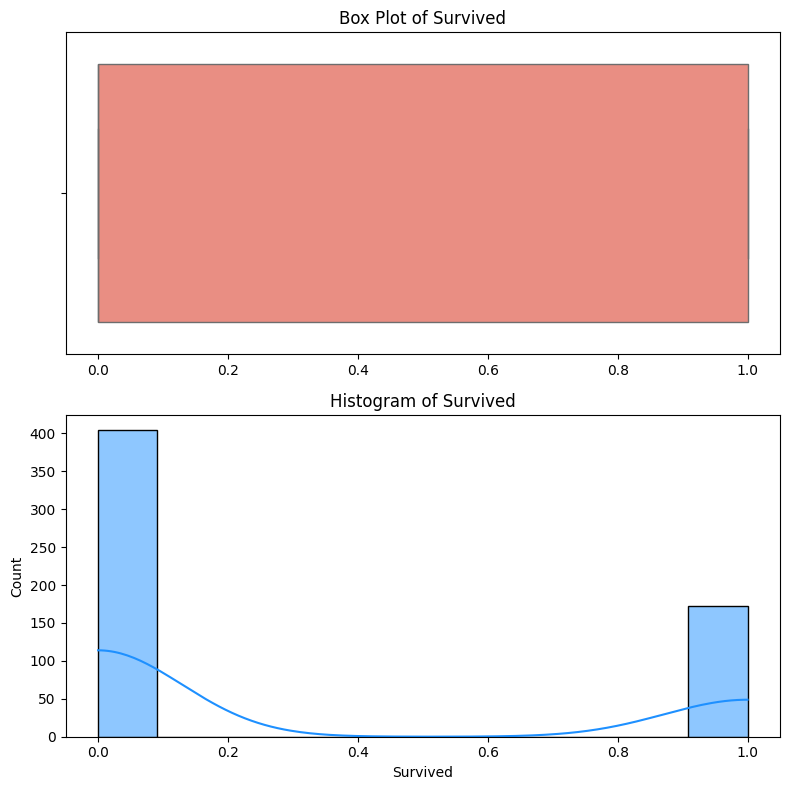

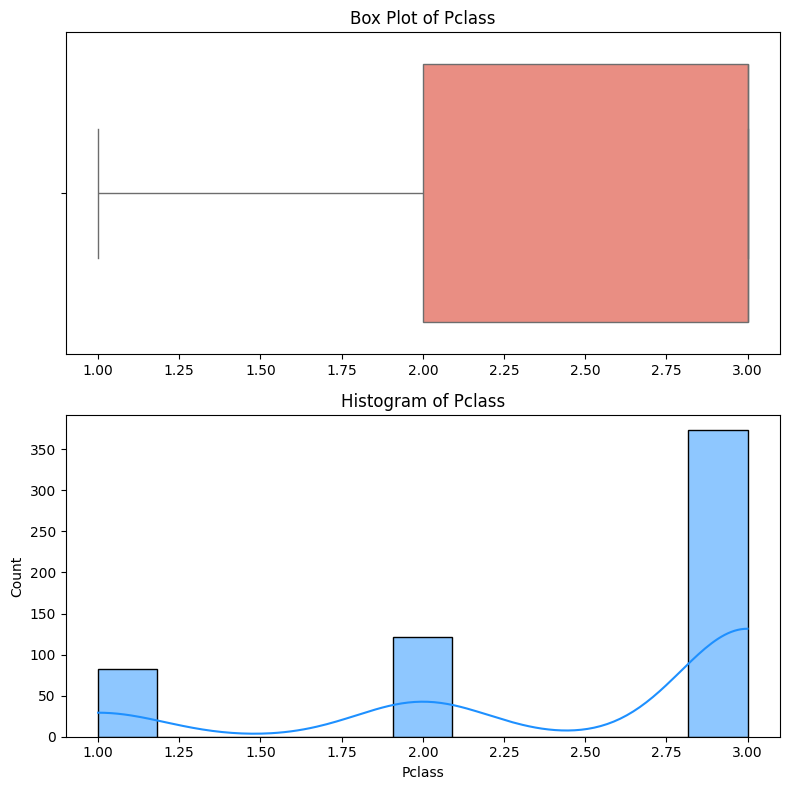

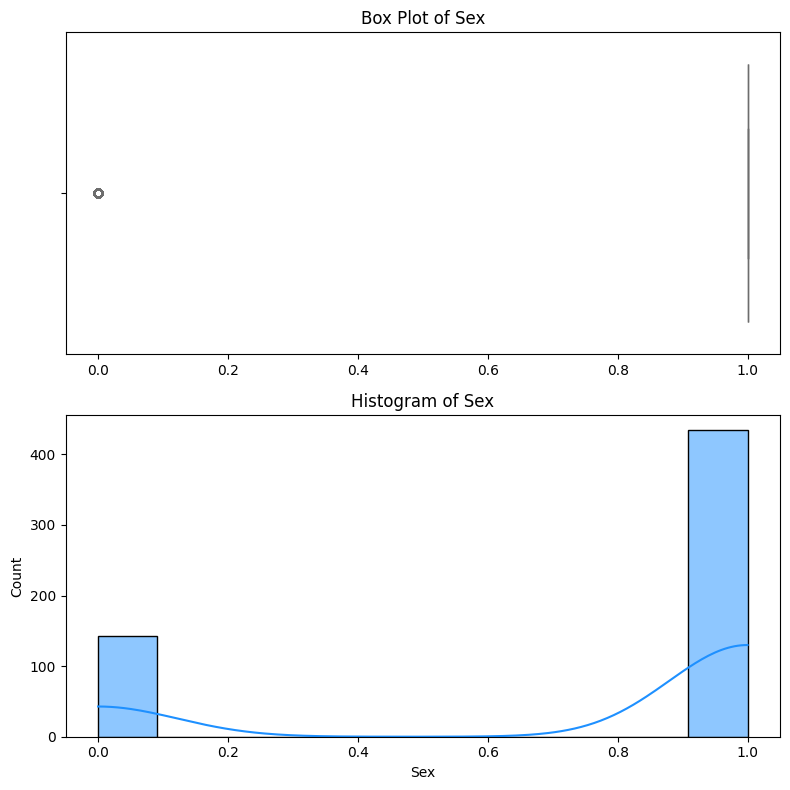

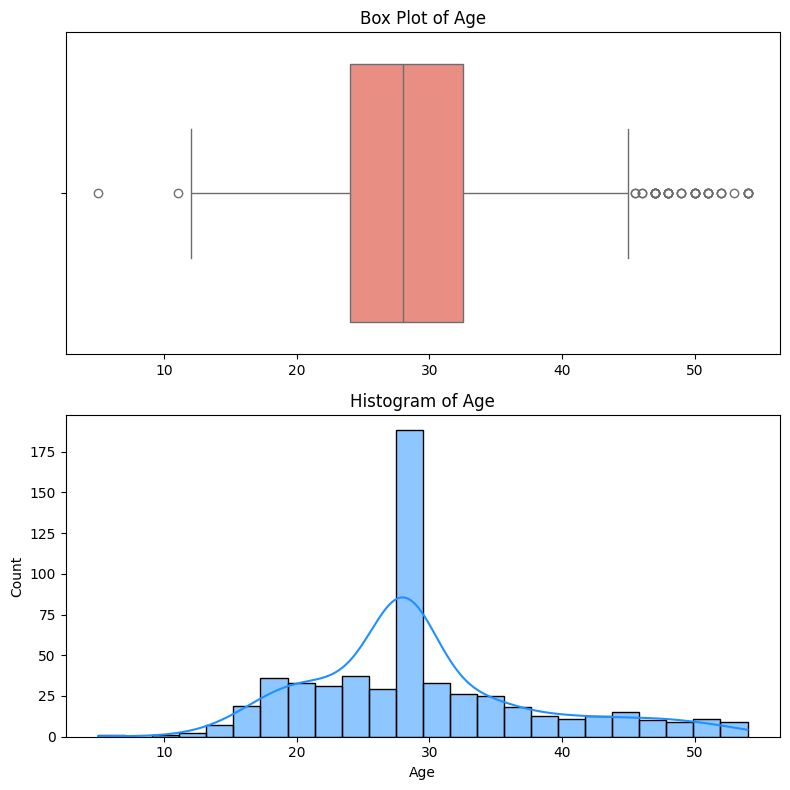

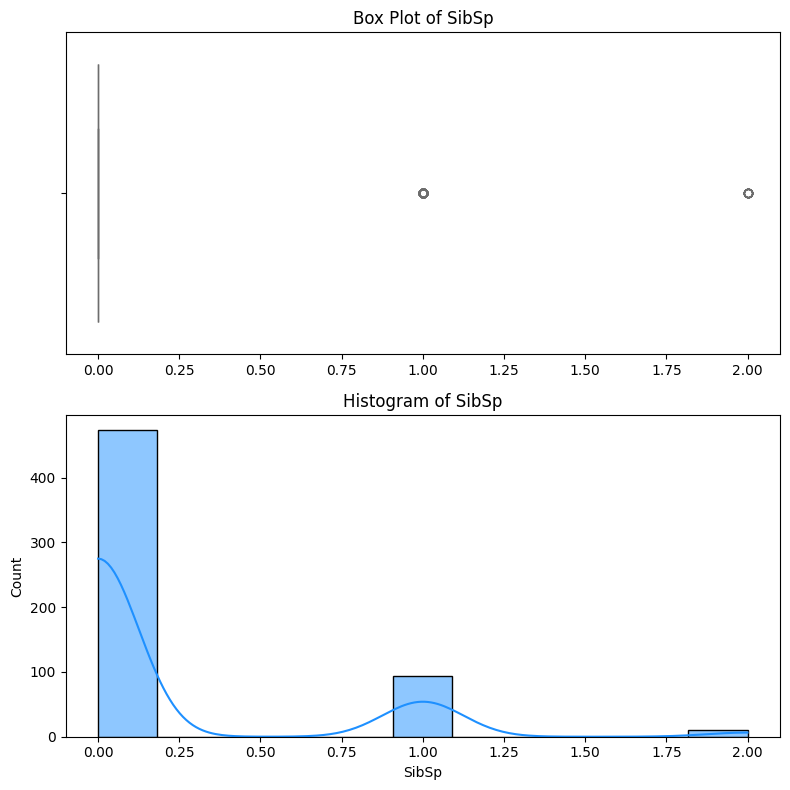

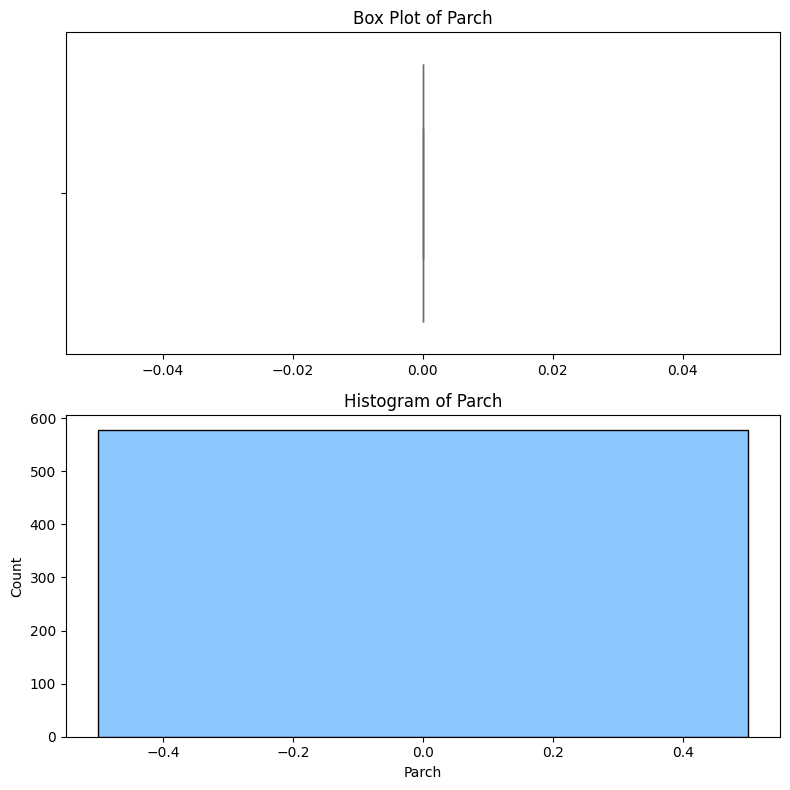

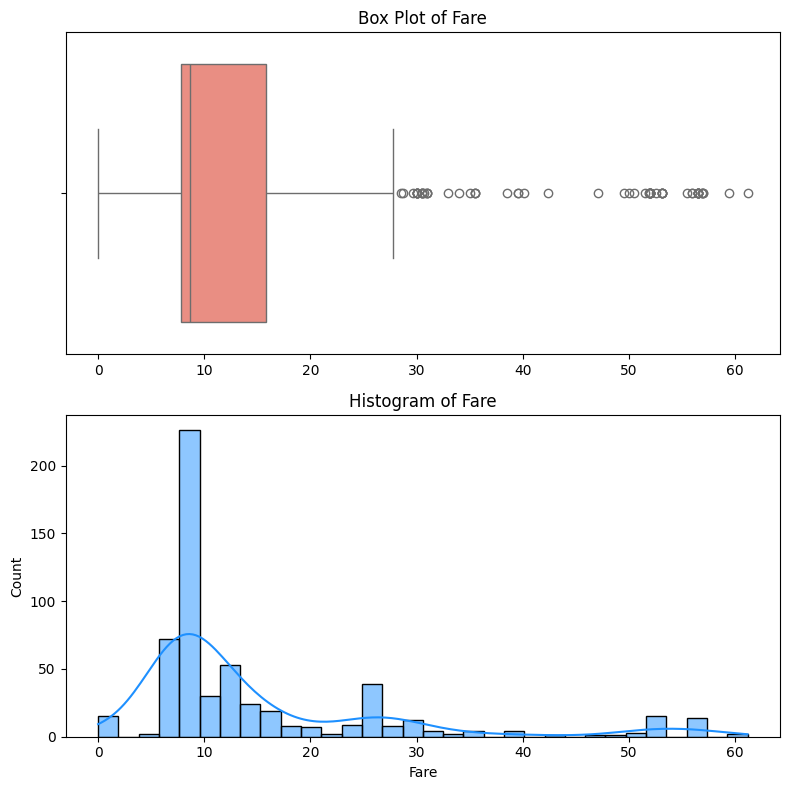

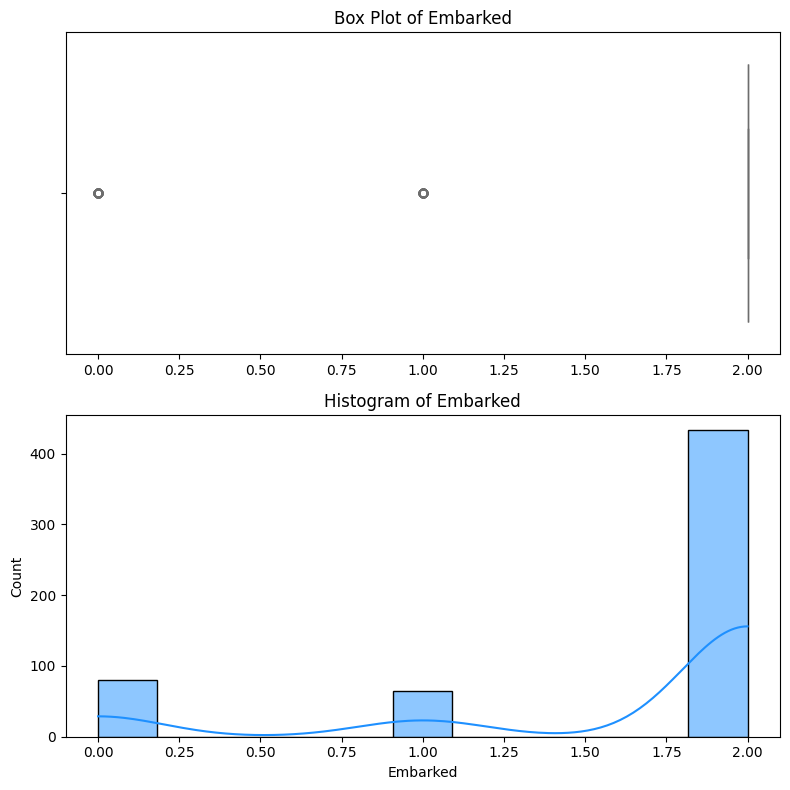

In [12]:
# Function to plot boxplot and histogram
def plot_boxplot_hist(data, column):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

    # Box plot
    sns.boxplot(x=data[column], color='salmon', ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')
    axes[0].set_xlabel('')

    # Histogram
    sns.histplot(data[column], kde=True, color='dodgerblue', ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot box plot and histogram for each numeric column one by one
for col in df_train.select_dtypes(include=['float64', 'int64']).columns:
    plot_boxplot_hist(df_train, col)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Pclass'),
  Text(2.5, 0, 'Sex'),
  Text(3.5, 0, 'Age'),
  Text(4.5, 0, 'SibSp'),
  Text(5.5, 0, 'Parch'),
  Text(6.5, 0, 'Fare'),
  Text(7.5, 0, 'Embarked')])

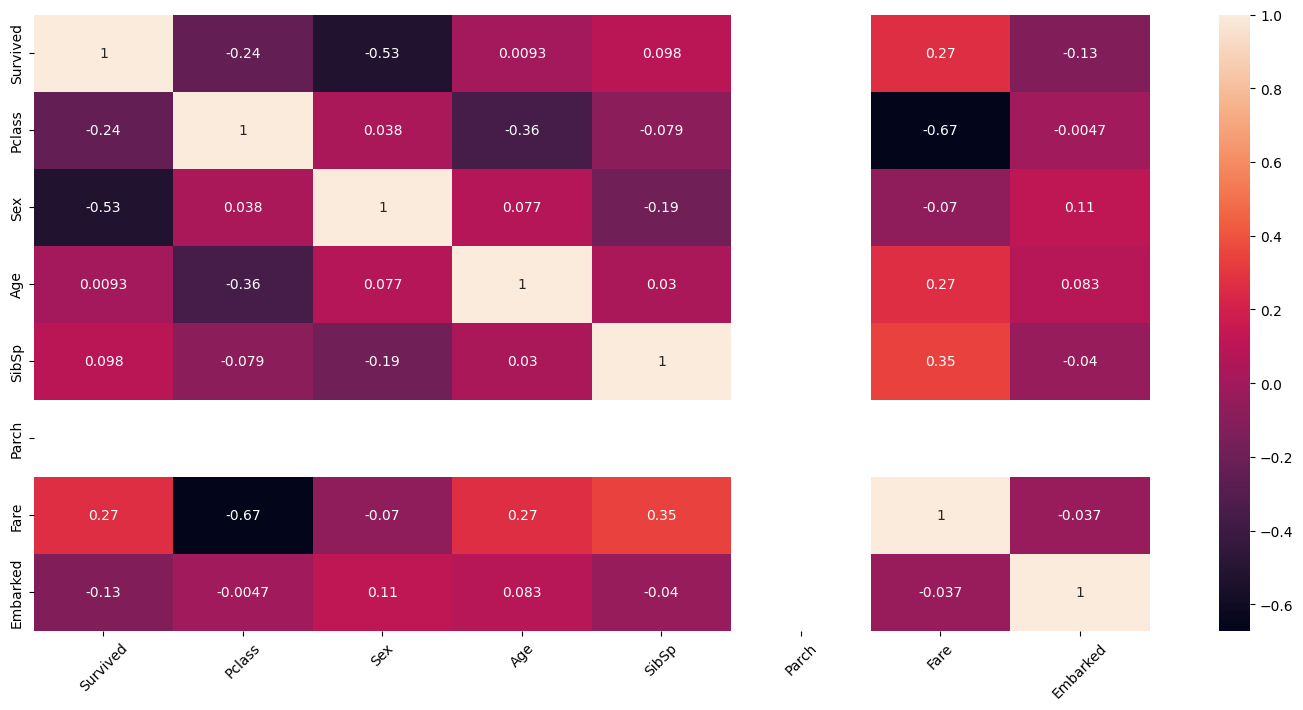

In [13]:
# Visualize the correlation matrix as a heatmap
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df_train.corr(), annot=True);
plt.xticks(rotation=45)

In [14]:
## Titanic_test.csv
df_test = pd.read_csv('Titanic_test.csv')
df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [15]:
# Total no.of rows and columns
df_test.shape

(418, 11)

In [16]:
# Drop serier which aren't necessary
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [17]:
# Check for missing values in the training set
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [18]:
# Fill missing values
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [19]:
# Encode 'Sex' column
le = LabelEncoder()
df_test['Sex'] = le.fit_transform(df_test['Sex'])

# Encode 'Embarked' column
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

In [20]:
df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
5,3,1,14.0,0,0,9.2250,2
6,3,0,30.0,0,0,7.6292,1
7,2,1,26.0,1,1,29.0000,2
8,3,0,18.0,0,0,7.2292,0
9,3,1,21.0,2,0,24.1500,2


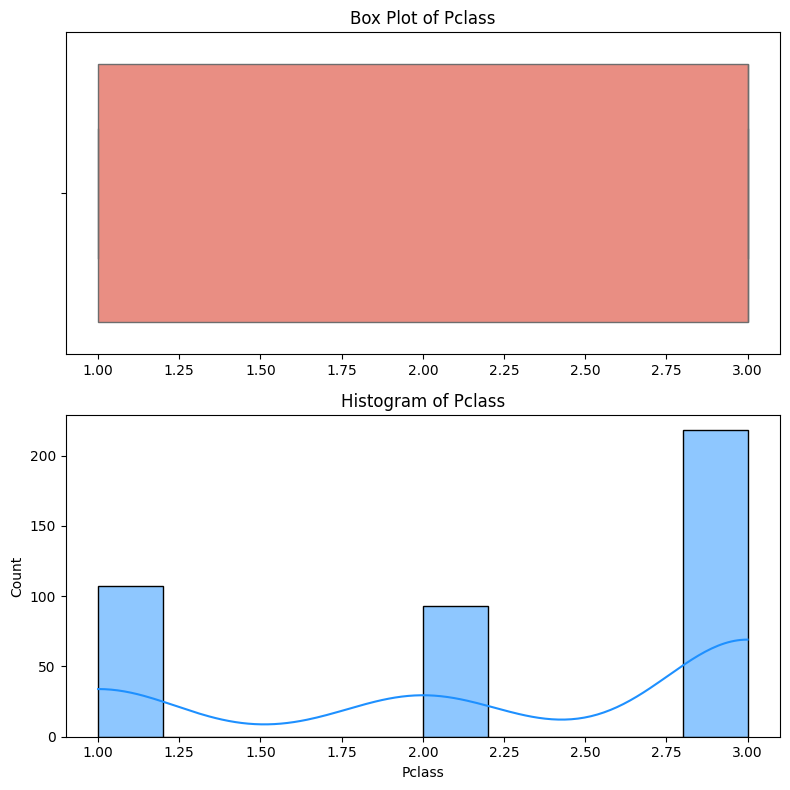

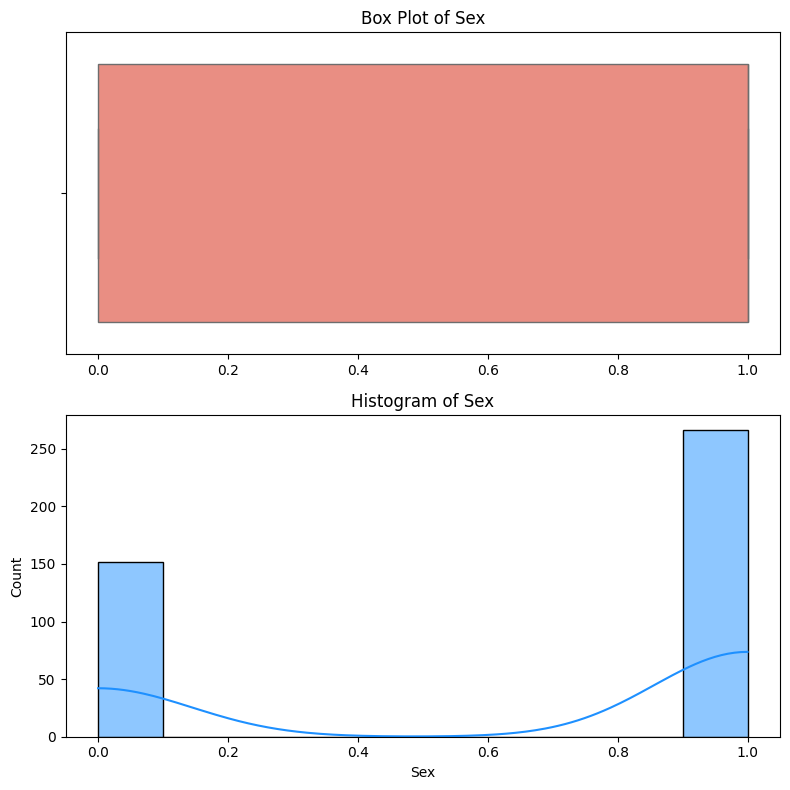

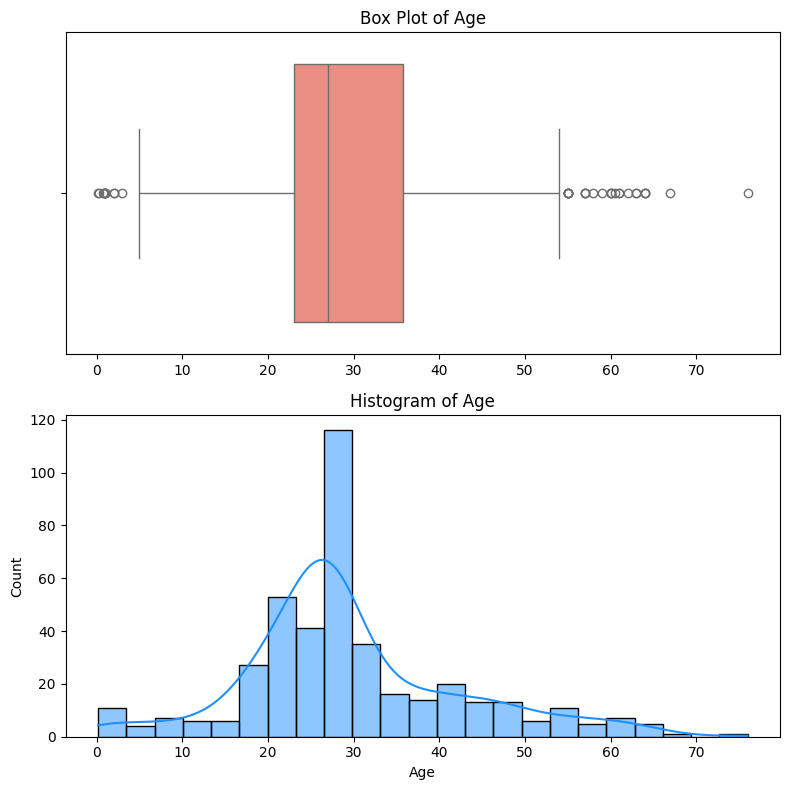

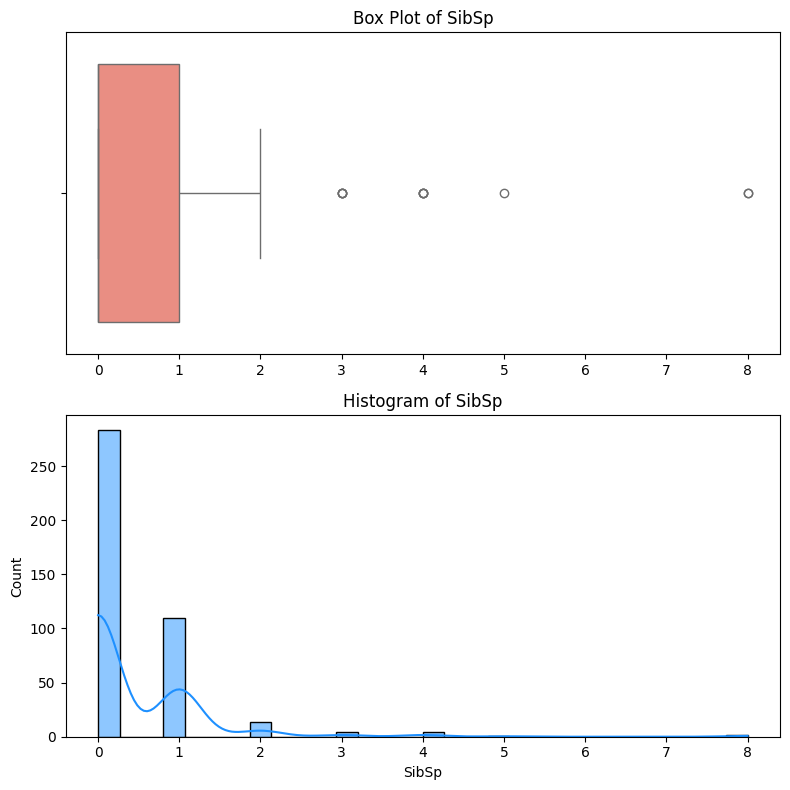

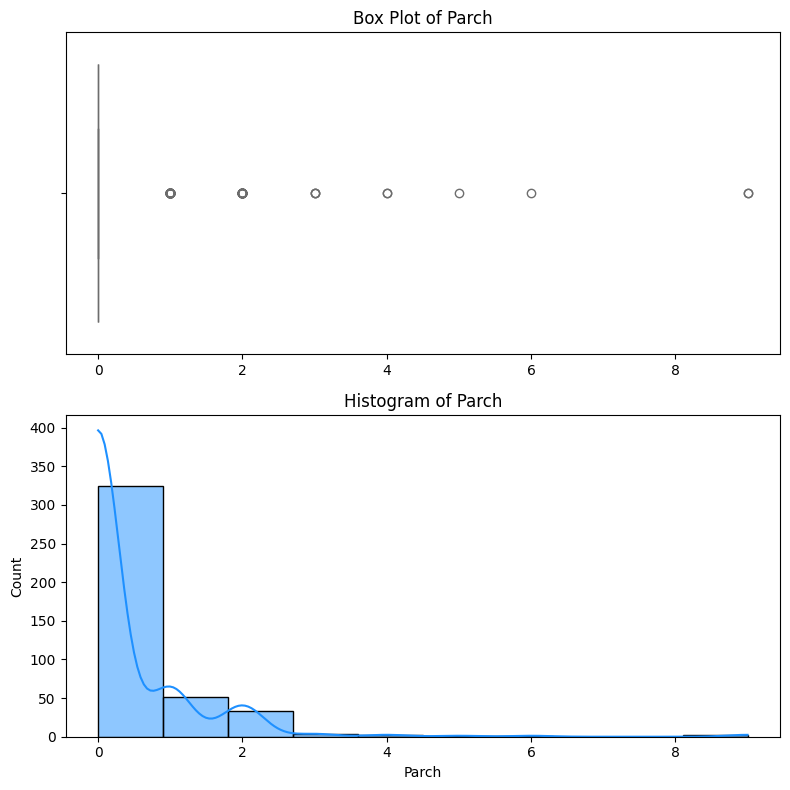

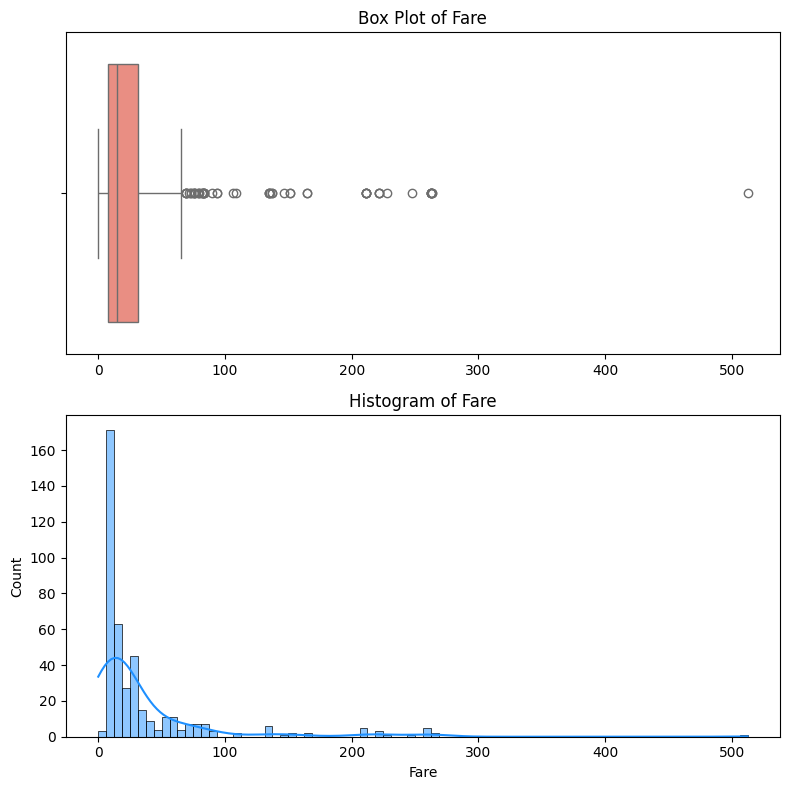

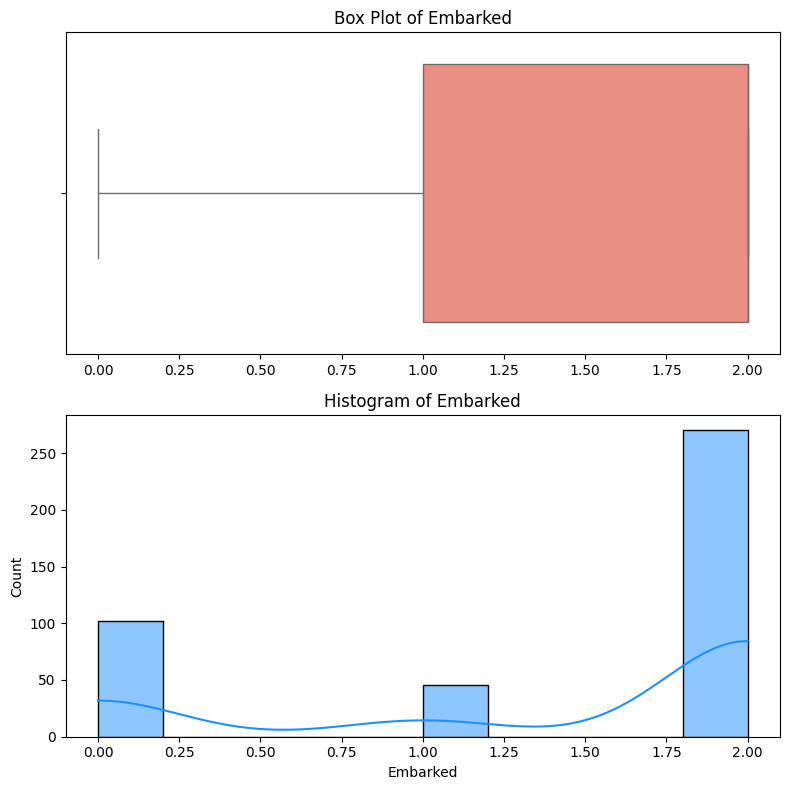

In [21]:
# Function to plot boxplot and histogram
def plot_boxplot_hist(data, column):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

    # Box plot
    sns.boxplot(x=data[column], color='salmon', ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')
    axes[0].set_xlabel('')

    # Histogram
    sns.histplot(data[column], kde=True, color='dodgerblue', ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot box plot and histogram for each numeric column one by one
for col in df_test.select_dtypes(include=['float64', 'int64']).columns:
    plot_boxplot_hist(df_test, col)

In [22]:
# Remove outliers of present

Q1 = df_test.quantile(0.25)
print(f'Q1:\n{Q1}')
Q3 = df_test.quantile(0.75)
print(f'\nQ3:\n{Q3}')
IQR = Q3 - Q1
print(f'\nIQR:\n{IQR}')

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
print(f'\nLower Bound:\n{lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'\nUpper Bound:\n{upper_bound}\n')

# Outliers
outliers = {}
for col in df_test.columns:
    df_test_outliers = df_test[(df_test[col] < lower_bound[col]) | (df_test[col] > upper_bound[col])]
    if not df_test_outliers.empty:
        outliers[col] = df_test_outliers[col]
        print(f"Outlier(s) in column '{col}':")
        print(df_test_outliers)
    else:
        print(f"No outliers in column '{col}'")

# Remove outliers
df_test_no_outliers = df_test[(df_test >= lower_bound) & (df_test <= upper_bound)].dropna().reset_index(drop=True)
print("\nNo outliers:")
print(df_test_no_outliers)

# Re-assigning to new variable
df_test = df_test_no_outliers
df_test.head()

Q1:
Pclass       1.0000
Sex          0.0000
Age         23.0000
SibSp        0.0000
Parch        0.0000
Fare         7.8958
Embarked     1.0000
Name: 0.25, dtype: float64

Q3:
Pclass       3.00
Sex          1.00
Age         35.75
SibSp        1.00
Parch        0.00
Fare        31.50
Embarked     2.00
Name: 0.75, dtype: float64

IQR:
Pclass       2.0000
Sex          1.0000
Age         12.7500
SibSp        1.0000
Parch        0.0000
Fare        23.6042
Embarked     1.0000
dtype: float64

Lower Bound:
Pclass      -2.0000
Sex         -1.5000
Age          3.8750
SibSp       -1.5000
Parch        0.0000
Fare       -27.5105
Embarked    -0.5000
dtype: float64

Upper Bound:
Pclass       6.0000
Sex          2.5000
Age         54.8750
SibSp        2.5000
Parch        0.0000
Fare        66.9063
Embarked     3.5000
dtype: float64

No outliers in column 'Pclass'
No outliers in column 'Sex'
Outlier(s) in column 'Age':
     Pclass  Sex    Age  SibSp  Parch        Fare  Embarked
2         2    1  62.00 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0.0,0.0,7.8292,1
1,3,0,47.0,1.0,0.0,7.0000,2
2,3,1,27.0,0.0,0.0,8.6625,2
3,3,1,14.0,0.0,0.0,9.2250,2
4,3,0,30.0,0.0,0.0,7.6292,1


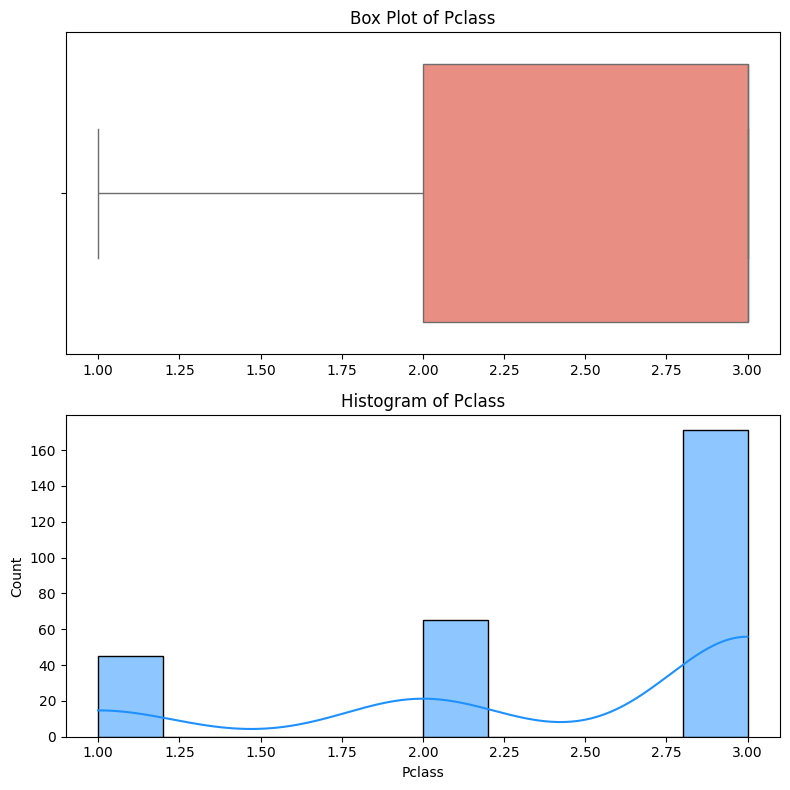

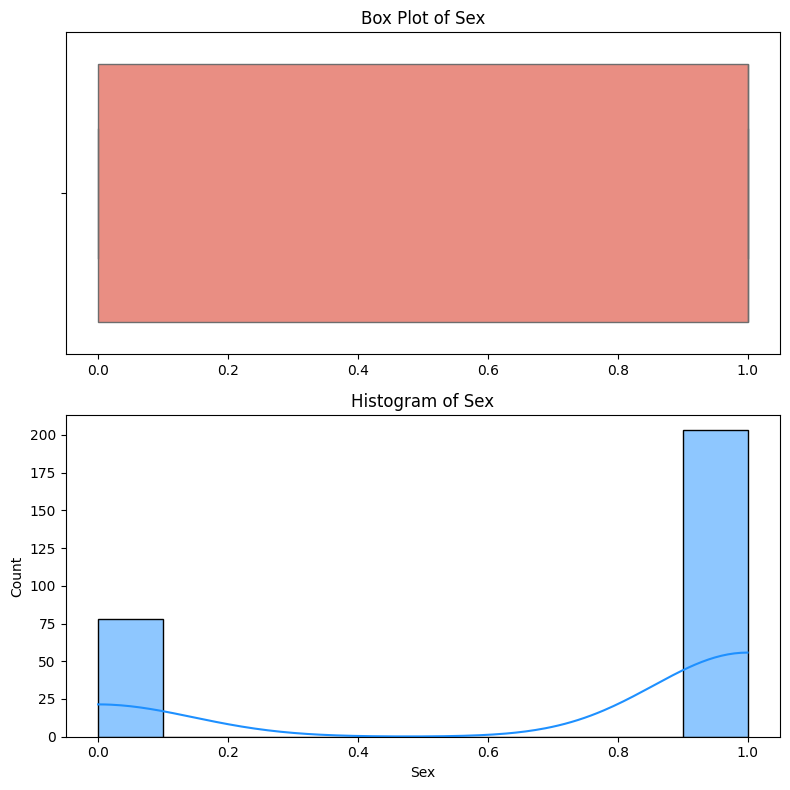

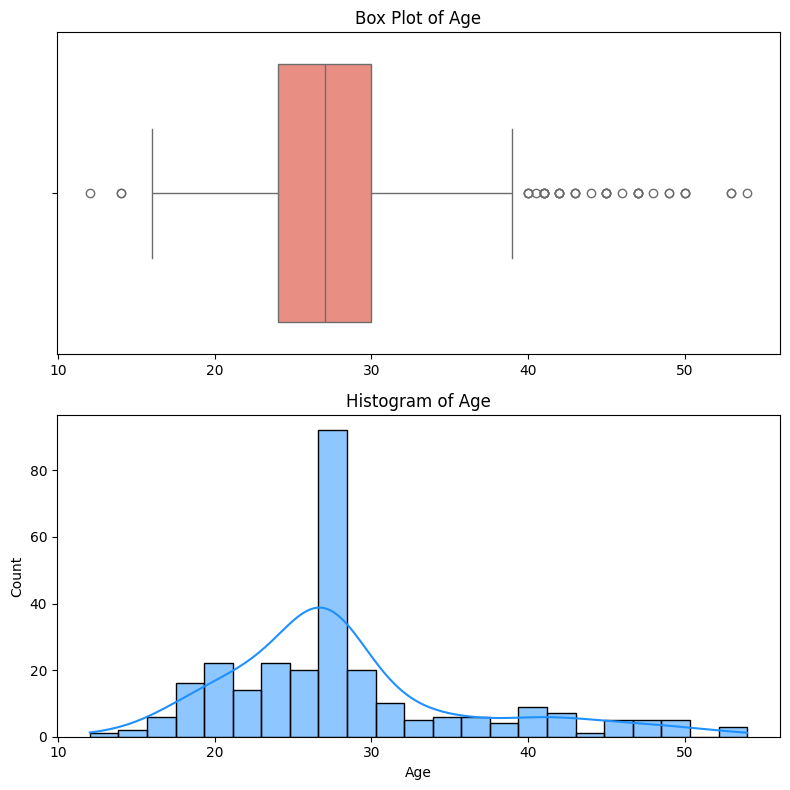

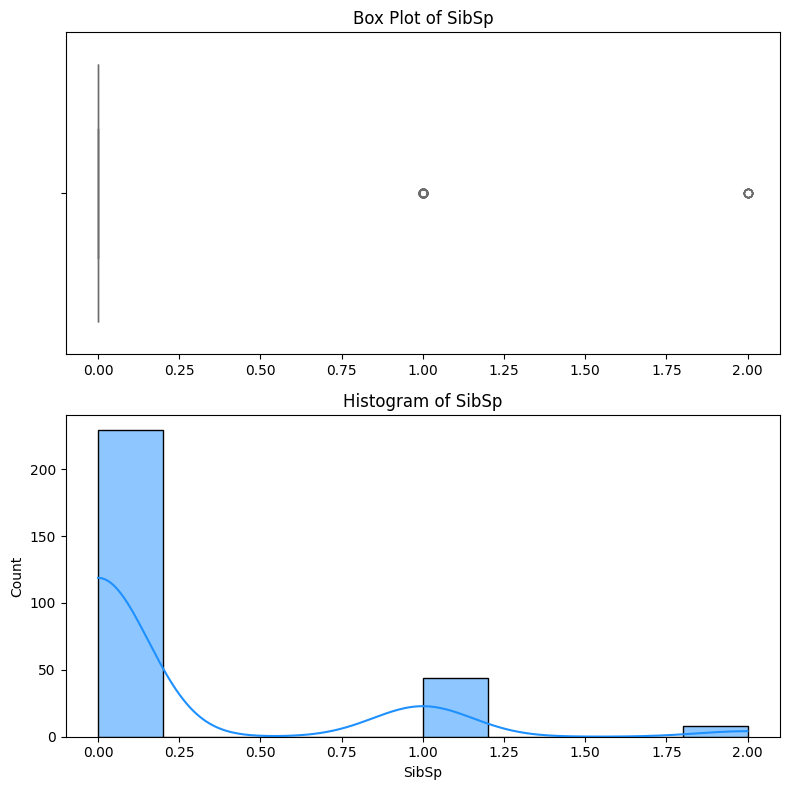

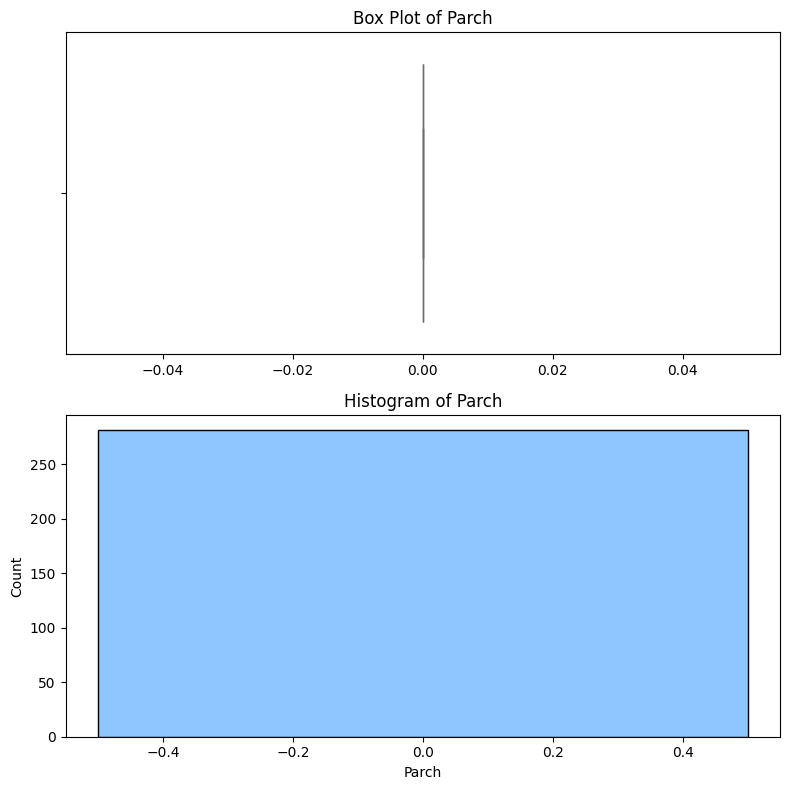

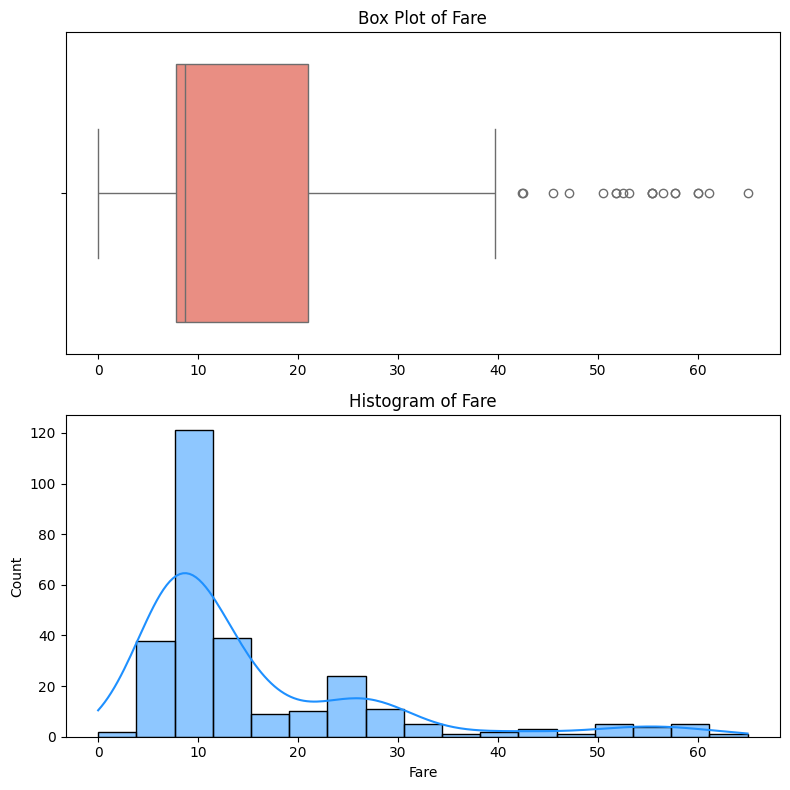

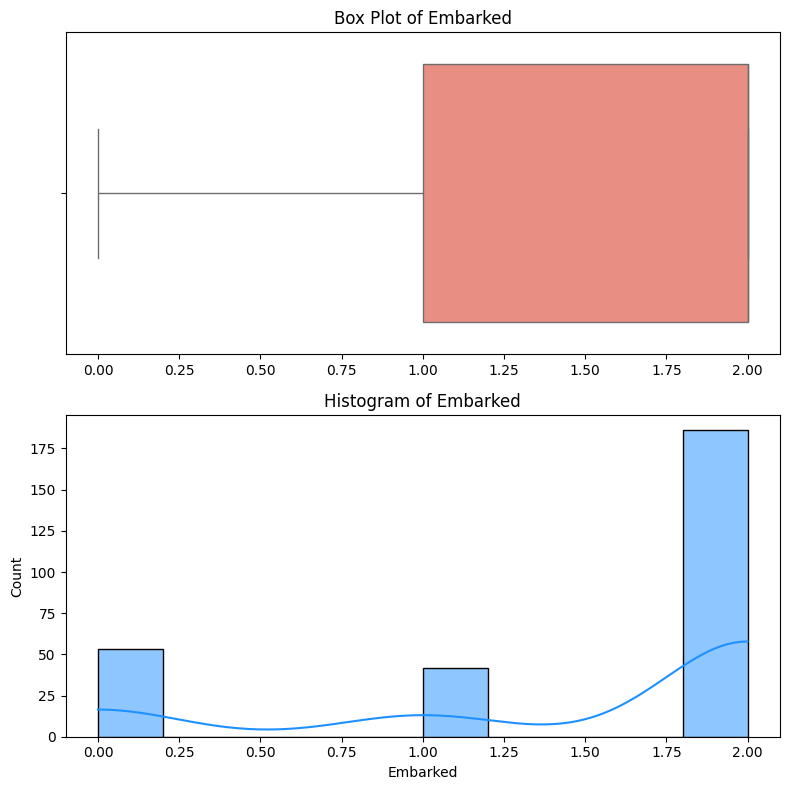

In [23]:
# Function to plot boxplot and histogram
def plot_boxplot_hist(data, column):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

    # Box plot
    sns.boxplot(x=data[column], color='salmon', ax=axes[0])
    axes[0].set_title(f'Box Plot of {column}')
    axes[0].set_xlabel('')

    # Histogram
    sns.histplot(data[column], kde=True, color='dodgerblue', ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot box plot and histogram for each numeric column one by one
for col in df_test.select_dtypes(include=['float64', 'int64']).columns:
    plot_boxplot_hist(df_test, col)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Pclass'),
  Text(1.5, 0, 'Sex'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'SibSp'),
  Text(4.5, 0, 'Parch'),
  Text(5.5, 0, 'Fare'),
  Text(6.5, 0, 'Embarked')])

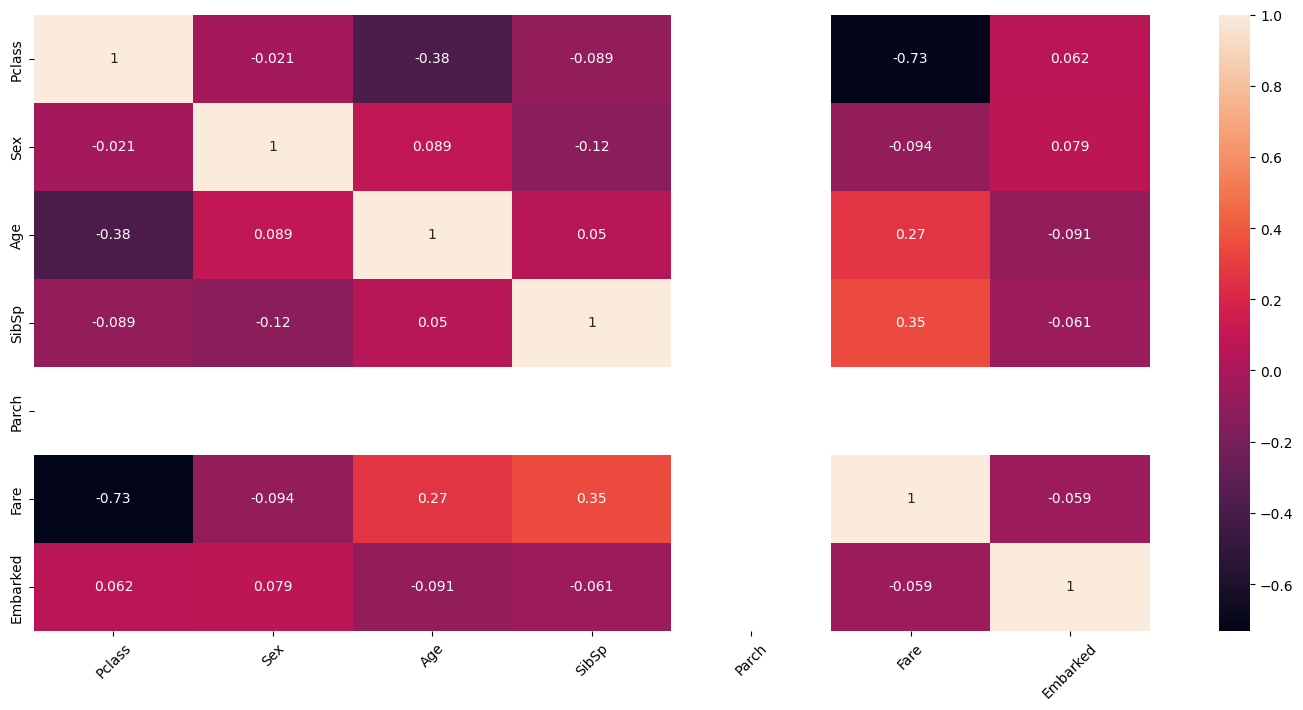

In [24]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df_test.corr(), annot=True);
plt.xticks(rotation=45)

## Build a Logistic model

In [25]:
# Select features and target variable
X_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = df_train['Survived']

X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [26]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Make predictions on the training set
y_train_pred = log_reg.predict(X_train)

# Make predictions on the test set
y_test = log_reg.predict(X_test)

# Predict the target values for df_test to create y_test
y_test_proba = log_reg.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

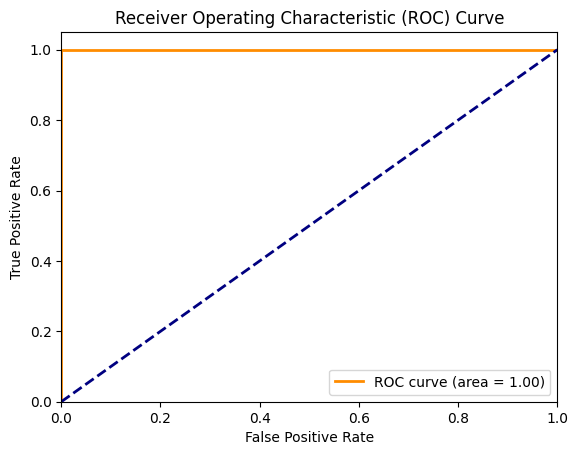

In [29]:
# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [30]:
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

# Print the classification report
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.8024263431542461
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       404
           1       0.69      0.63      0.66       173

    accuracy                           0.80       577
   macro avg       0.77      0.75      0.76       577
weighted avg       0.80      0.80      0.80       577



[[354  50]
 [ 64 109]]


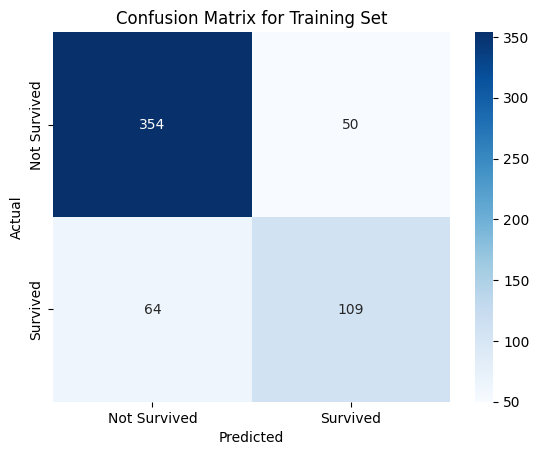

In [31]:
# Confusion matrix for the training set
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Set')
plt.show()

#### Overall Performance:

With an overall accuracy of 80%, the model performs reasonably well on the training set. However, the performance can be further evaluated and potentially improved, especially for class 1.

#### Next Steps
1. Check for Class Imbalance:
    - Investigate if there is a class imbalance and consider techniques like resampling, SMOTE, or adjusting class weights to address it.
2. Evaluate on Test Set:
    - Assess the model's performance on the test set to ensure it generalizes well and is not overfitting the training data.
3. Model Tuning:
    - Experiment with different algorithms, hyperparameters, or feature engineering to improve overall performance and, specifically, the performance for class 1.

Survived
0    404
1    173
Name: count, dtype: int64


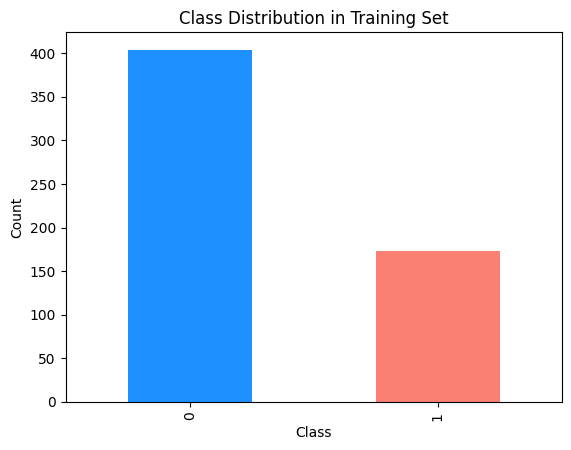

In [32]:
# Check for Class Imbalance
# Check the distribution of classes in the training set
class_counts = df_train['Survived'].value_counts()
print(class_counts)

# Visualize the class distribution
class_counts.plot(kind='bar', color=['dodgerblue', 'salmon'])
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [33]:
# Address Class Imbalance
# If there is a class imbalance, we can use techniques like resampling or SMOTE to balance the classes.
# Using SMOTE (Synthetic Minority Over-sampling Technique)

# Separate features and target
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and validation sets
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Verify the new class distribution
print(y_train_resampled.value_counts())

Survived
1    328
0    318
Name: count, dtype: int64


Validation Accuracy: 0.8395061728395061
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.84      0.82      0.83        76

    accuracy                           0.84       162
   macro avg       0.84      0.84      0.84       162
weighted avg       0.84      0.84      0.84       162

[[74 12]
 [14 62]]


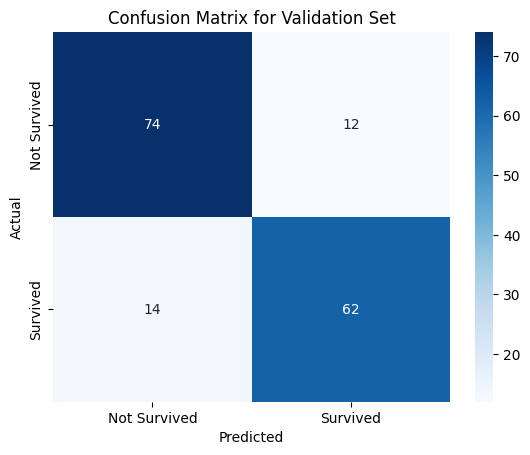

In [34]:
# Evaluate on Test Set
# Train the model on the resampled training data and evaluate it on the validation set (or test set).

# Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_resampled)

# Evaluate the model
val_accuracy = accuracy_score(y_val_resampled, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

# Print the classification report
print(classification_report(y_val_resampled, y_val_pred))

# Confusion matrix
cm = confusion_matrix(y_val_resampled, y_val_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Validation Set')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Score: 0.8127131782945736
Validation Accuracy (Best Model): 0.8395061728395061
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.84      0.82      0.83        76

    accuracy                           0.84       162
   macro avg       0.84      0.84      0.84       162
weighted avg       0.84      0.84      0.84       162

[[74 12]
 [14 62]]


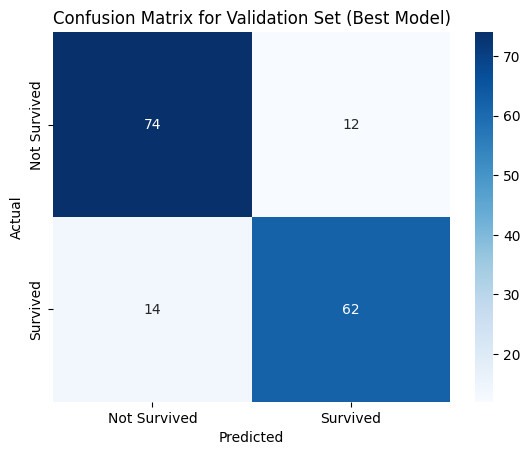

In [35]:
# Model Tuning
# Experiment with different algorithms, hyperparameters, and feature engineering to improve performance.
# Hyperparameter Tuning with GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Train the model with the best parameters
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set with the best model
y_val_pred_best = best_log_reg.predict(X_val_resampled)

# Evaluate the best model
val_accuracy_best = accuracy_score(y_val_resampled, y_val_pred_best)
print(f'Validation Accuracy (Best Model): {val_accuracy_best}')

# Print the classification report for the best model
print(classification_report(y_val_resampled, y_val_pred_best))

# Confusion matrix for the best model
cm_best = confusion_matrix(y_val_resampled, y_val_pred_best)
print(cm_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Validation Set (Best Model)')
plt.show()

<ipython-input-36-d7a15a838b99>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


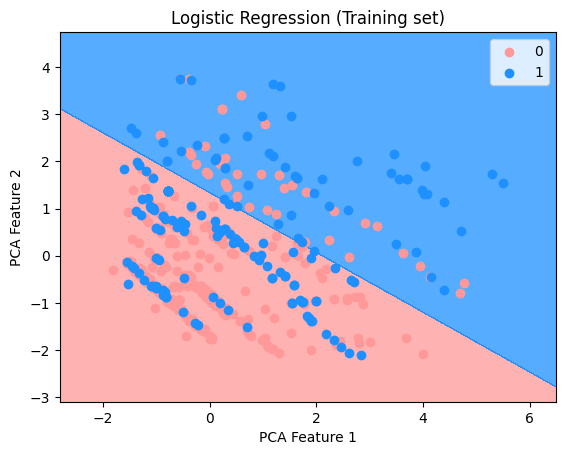

In [36]:
# Plotting the decision boundary (for 2D visualization, we reduce the dimensions using PCA or t-SNE)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the model on the reduced data
log_reg.fit(X_train_pca, y_train)

# Visualize the decision boundaries for the training set
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['#FF9999', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(['#FF9999', '#1E90FF'])(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

<ipython-input-37-8809513b6e51>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


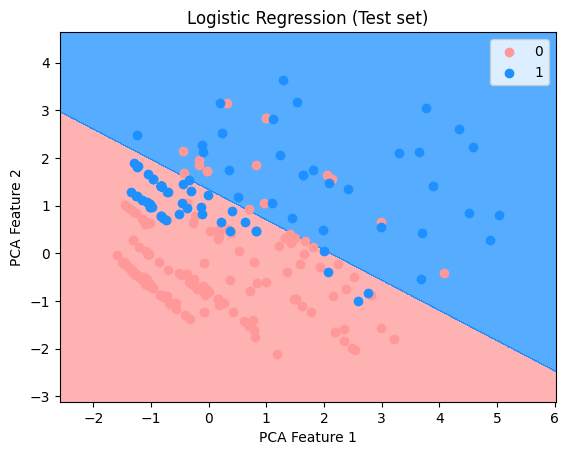

In [37]:
# Visualize the decision boundaries for the test set
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['#FF9999', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(['#FF9999', '#1E90FF'])(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [38]:
# Print the classification report and confusion matrix
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test_pca))
print(f'Testing Accuracy: {test_accuracy}')

print('Confusion Matrix:')
print(confusion_matrix(y_test, log_reg.predict(X_test_pca)))
print('Classification Report:')
print(classification_report(y_test, log_reg.predict(X_test_pca)))

Testing Accuracy: 0.7615658362989324
Confusion Matrix:
[[183  16]
 [ 51  31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       199
           1       0.66      0.38      0.48        82

    accuracy                           0.76       281
   macro avg       0.72      0.65      0.66       281
weighted avg       0.75      0.76      0.74       281



#### Overall Performance:
With an overall accuracy of 76.16%, the model performs reasonably well on the test set. However, there is room for improvement, especially for class 1 predictions.

#### Next steps:
1. Improve Class 1 Prediction:
    - Since the model's performance for class 1 is weaker, consider ways to improve the model's ability to correctly identify instances of class 1. This could involve feature engineering, model tuning, or using a different algorithm.
2. Evaluate Further:
    - It's important to consider the context of the problem and the implications of false positives and false negatives. Further evaluation and refinement of the model may be necessary to achieve the desired balance between precision and recall for both classes.
3. Consider Other Metrics:`
    - Depending on the specific requirements of the problem, other metrics such as ROC-AUC or precision-recall curves may provide additional insights into the model's performance, especially for imbalanced datasets.

In [39]:
# Feature Engineering
# Creating new features
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [40]:
# Model Tuning (Hyperparameter tuning with GridSearchCV)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

LogisticRegression(C=10, random_state=42, solver='liblinear')

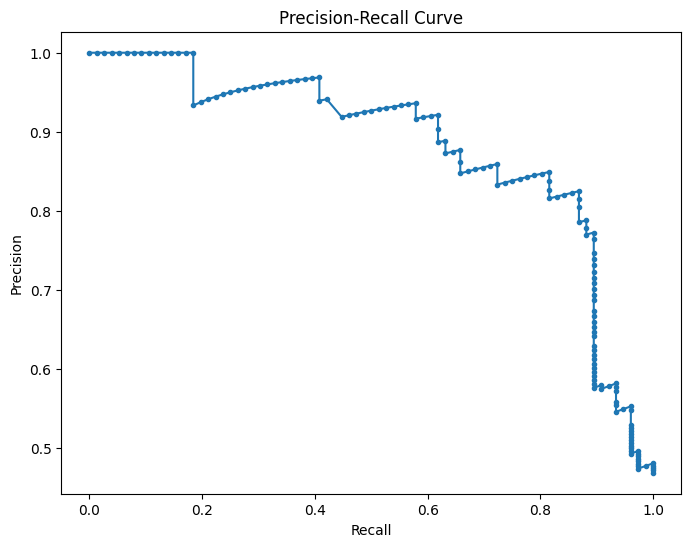

In [41]:
# Evaluate Further
# Precision-Recall Curve

# Get predicted probabilities for class 1
y_proba = best_log_reg.predict_proba(X_val_resampled)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_val_resampled, y_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

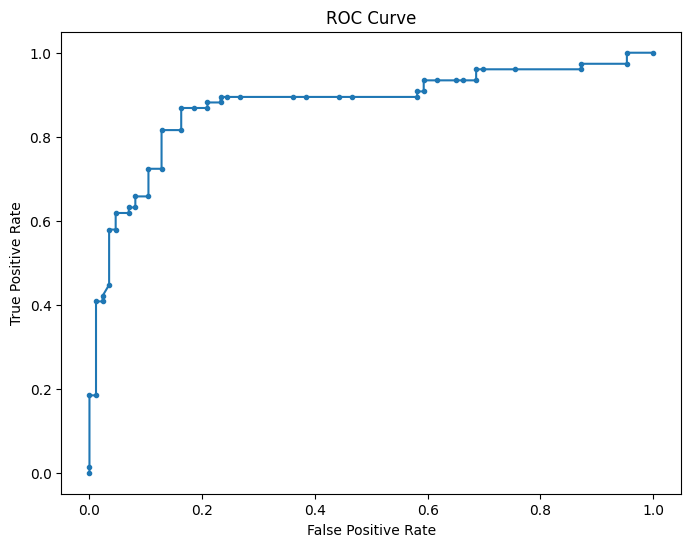

ROC-AUC: 0.8759179926560589


In [42]:
# Consider Other Metrics like ROC-AUC
# Calculate ROC curve

fpr, tpr, _ = roc_curve(y_val_resampled, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val_resampled, y_proba)
print(f'ROC-AUC: {roc_auc}')